# Five Test

This time we are doing better practices. Calling our policy from the factory and visualizing that subtask are being generated correctly.

In [2]:
from huggingface_hub import login
login()

In [ ]:
# Dependencies Installation
# Not explicitly because the repo is private.

Using Python 3.12.12 environment at: /usr
Resolved 215 packages in 19.92s
Prepared 46 packages in 20.27s
Uninstalled 15 packages in 1.20s
Installed 46 packages in 238ms
 + async-lru==2.0.5
 + av==15.1.0
 + comm==0.2.3
 + deepdiff==8.6.1
 - diffusers==0.36.0
 + diffusers==0.35.2
 + draccus==0.10.0
 + evdev==1.9.2
 + faker==40.1.0
 + feetech-servo-sdk==1.0.0
 - huggingface-hub==0.36.0
 + huggingface-hub==0.35.3
 + inquirerpy==0.3.4
 - ipykernel==6.17.1
 + ipykernel==7.1.0
 + jedi==0.19.2
 + json5==0.13.0
 + jsonlines==4.0.0
 + jupyter==1.1.1
 - jupyter-client==7.4.9
 + jupyter-client==8.7.0
 + jupyter-lsp==2.3.0
 + jupyterlab==4.5.1
 + jupyterlab-server==2.28.0
 + lerobot==0.4.3 (from git+https://github.com/huggingface/lerobot.git@6106a8136c62fad75905f1eefc087f2fdaa6b10c)
 + mergedeep==1.3.4
 + mypy-extensions==1.1.0
 - notebook==6.5.7
 + notebook==7.5.1
 - nvidia-cudnn-cu12==9.10.2.21
 + nvidia-cudnn-cu12==9.5.1.17
 - nvidia-cusparselt-cu12==0.7.1
 + nvidia-cusparselt-cu12==0.6.3
 - nvi

In [3]:
import torch
from lerobot.datasets.lerobot_dataset import LeRobotDataset
from xhuman.policies.factory import get_xhuman_policy_class
from lerobot.processor.core import TransitionKey
from lerobot.utils.constants import OBS_LANGUAGE_TOKENS
from transformers import AutoTokenizer
from xhuman.policies.pi05.processor_pi05 import (
    make_pi05_pre_post_processors_ki,
)

In [4]:
DS_ID = "NONHUMAN-RESEARCH/TEST_RECORD_ANNOTATIONS"
PRETRAINED_PATH = "lerobot/pi05_base"

In [5]:
dataset = LeRobotDataset(DS_ID)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

stats.json: 0.00B [00:00, ?B/s]

info.json: 0.00B [00:00, ?B/s]

meta/tasks.parquet:   0%|          | 0.00/2.15k [00:00<?, ?B/s]

meta/episodes/chunk-000/file-000.parquet:   0%|          | 0.00/65.3k [00:00<?, ?B/s]

meta/episodes/chunk-000/file-001.parquet:   0%|          | 0.00/65.3k [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

videos/observation.images.right/chunk-00(…):   0%|          | 0.00/5.53M [00:00<?, ?B/s]

videos/observation.images.right/chunk-00(…):   0%|          | 0.00/5.92M [00:00<?, ?B/s]

data/chunk-000/file-001.parquet:   0%|          | 0.00/315k [00:00<?, ?B/s]

data/chunk-000/file-000.parquet:   0%|          | 0.00/357k [00:00<?, ?B/s]

videos/observation.images.left/chunk-000(…):   0%|          | 0.00/8.71M [00:00<?, ?B/s]

videos/observation.images.left/chunk-000(…):   0%|          | 0.00/8.51M [00:00<?, ?B/s]

videos/observation.images.top/chunk-000/(…):   0%|          | 0.00/14.9M [00:00<?, ?B/s]

videos/observation.images.top/chunk-000/(…):   0%|          | 0.00/13.3M [00:00<?, ?B/s]

In [7]:
from xhuman.policies.pi05.configuration_pi05 import  PI05Config
device = "cuda"
policy_config = PI05Config(
        pretrained_path=PRETRAINED_PATH,  # Set pretrained path so factory loads weights
        device=device,
    )

In [9]:
from xhuman.policies.factory import make_xhuman_policy
policy = make_xhuman_policy(
        cfg=policy_config,
        ds_meta=dataset.meta,
    )

/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

Loading model from: lerobot/pi05_base


model.safetensors:   0%|          | 0.00/14.5G [00:00<?, ?B/s]

✓ Loaded state dict from model.safetensors
Remapped: action_in_proj.bias -> model.action_in_proj.bias
Remapped: action_in_proj.weight -> model.action_in_proj.weight
Remapped: action_out_proj.bias -> model.action_out_proj.bias
Remapped: action_out_proj.weight -> model.action_out_proj.weight
Remapped: paligemma_with_expert.gemma_expert.lm_head.weight -> model.paligemma_with_expert.gemma_expert.lm_head.weight
Remapped: paligemma_with_expert.gemma_expert.model.layers.0.input_layernorm.dense.bias -> model.paligemma_with_expert.gemma_expert.model.layers.0.input_layernorm.dense.bias
Remapped: paligemma_with_expert.gemma_expert.model.layers.0.input_layernorm.dense.weight -> model.paligemma_with_expert.gemma_expert.model.layers.0.input_layernorm.dense.weight
Remapped: paligemma_with_expert.gemma_expert.model.layers.0.mlp.down_proj.weight -> model.paligemma_with_expert.gemma_expert.model.layers.0.mlp.down_proj.weight
Remapped: paligemma_with_expert.gemma_expert.model.layers.0.mlp.gate_proj.weigh

In [12]:
dataset

LeRobotDataset({
    Repository ID: 'NONHUMAN-RESEARCH/TEST_RECORD_ANNOTATIONS',
    Number of selected episodes: '4',
    Number of selected samples: '4352',
    Features: '['action', 'observation.state', 'observation.images.left', 'observation.images.top', 'observation.images.right', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index']',
})',

In [15]:
from typing import  Dict, Any
def rename_features(batch: Dict[str, Any]) -> Dict[str, Any]:
    """Rename image feature keys to match policy expectations."""
    # Create a copy to avoid modifying the original dictionary while iterating
    renamed_batch = batch.copy()

    # Define the mapping from current keys to expected keys
    key_mapping = {
        "observation.images.left": "observation.images.base_0_rgb",
        "observation.images.top": "observation.images.left_wrist_0_rgb",
        "observation.images.right": "observation.images.right_wrist_0_rgb",
    }

    for old_key, new_key in key_mapping.items():
        if old_key in renamed_batch:
            renamed_batch[new_key] = renamed_batch.pop(old_key)

    return renamed_batch

In [18]:
frame0 = rename_features(dataset[0])

In [21]:
frame0

{'action': tensor([   3.0040, -100.0000,   99.6652,   -2.0757,   32.8207,    7.7900,
            0.0000,    9.4946,  -95.8404,   99.2218,   -1.0989,   40.3226,
            3.1990,    0.4890]),
 'observation.state': tensor([   0.0000, -100.0000,  100.0000,    0.0000,   35.6643,    0.0000,
            0.2000,    0.0000, -100.0000,  100.0000,    0.0000,   35.6671,
            0.0000,    0.9800]),
 'timestamp': tensor(0.),
 'frame_index': tensor(0),
 'episode_index': tensor(0),
 'index': tensor(0),
 'task_index': tensor(0),
 'task': 'Pick up the banana',
 'observation.images.base_0_rgb': tensor([[[0.3373, 0.3412, 0.3412,  ..., 0.6235, 0.6235, 0.6235],
          [0.3373, 0.3412, 0.3412,  ..., 0.6235, 0.6235, 0.6235],
          [0.3373, 0.3373, 0.3373,  ..., 0.6235, 0.6235, 0.6235],
          ...,
          [0.2627, 0.2627, 0.2627,  ..., 0.4275, 0.4314, 0.4275],
          [0.2627, 0.2627, 0.2627,  ..., 0.4275, 0.4275, 0.4235],
          [0.2627, 0.2627, 0.2627,  ..., 0.4275, 0.4275, 0.4275]]

In [19]:
pre, post = make_pi05_pre_post_processors_ki(
    config=policy_config,
    dataset_stats=dataset.meta.stats,
)

In [20]:
policy_input = pre(frame0)
policy_input

{'action': tensor([[-0.9447, -1.0000,  1.0142, -0.2006, -0.5036,  0.2720, -1.0005,  0.6644,
          -0.9995,  0.9961,  0.2862, -0.4451, -0.6231, -0.9994]],
        device='cuda:0'),
 'next.reward': 0.0,
 'next.done': False,
 'next.truncated': False,
 'info': {},
 'task': ['Task: pick up the banana., State: -1 0 255 114 77 112 -1 164 -1 255 175 53 20 2 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128;\nAction: '],
 'index': tensor([0], device='cuda:0'),
 'task_index': tensor([0], device='cuda:0'),
 'episode_index': tensor(0, device='cuda:0'),
 'observation.state': tensor([[-1.1085, -0.9999,  1.0195, -0.1091, -0.3979, -0.1182, -1.0005,  0.2851,
          -1.0615,  1.0066,  0.3678, -0.5822, -0.8383, -0.9827]],
        device='cuda:0'),
 'observation.images.base_0_rgb': tensor([[[[0.3373, 0.3412, 0.3412,  ..., 0.6235, 0.6235, 0.6235],
           [0.3373, 0.3412, 0.3412,  ..., 0.6235, 0.6235, 0.6235],
           [0.3373, 0.3373, 0.3373,  ..., 0.6235, 0.6235, 0.6235]

In [30]:
frame2 = dataset[0]
batch2 = pre(frame2)
batch2

{'action': tensor([[-0.9447, -1.0000,  1.0142, -0.2006, -0.5036,  0.2720, -1.0005,  0.6644,
          -0.9995,  0.9961,  0.2862, -0.4451, -0.6231, -0.9994]],
        device='cuda:0'),
 'next.reward': 0.0,
 'next.done': False,
 'next.truncated': False,
 'info': {},
 'task': ['Task: pick up the banana., State: -1 0 255 114 77 112 -1 164 -1 255 175 53 20 2 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128;\nAction: '],
 'index': tensor([0], device='cuda:0'),
 'task_index': tensor([0], device='cuda:0'),
 'episode_index': tensor(0, device='cuda:0'),
 'observation.images.left': tensor([[[[0.3373, 0.3412, 0.3412,  ..., 0.6235, 0.6235, 0.6235],
           [0.3373, 0.3412, 0.3412,  ..., 0.6235, 0.6235, 0.6235],
           [0.3373, 0.3373, 0.3373,  ..., 0.6235, 0.6235, 0.6235],
           ...,
           [0.2627, 0.2627, 0.2627,  ..., 0.4275, 0.4314, 0.4275],
           [0.2627, 0.2627, 0.2627,  ..., 0.4275, 0.4275, 0.4235],
           [0.2627, 0.2627, 0.2627,  ..., 0.4275,

In [29]:
policy_config.image_features

{'observation.images.left': PolicyFeature(type=<FeatureType.VISUAL: 'VISUAL'>, shape=(3, 376, 672)),
 'observation.images.top': PolicyFeature(type=<FeatureType.VISUAL: 'VISUAL'>, shape=(3, 376, 672)),
 'observation.images.right': PolicyFeature(type=<FeatureType.VISUAL: 'VISUAL'>, shape=(3, 376, 672))}

In [27]:
present_img_keys = [
            key for key in policy_config.image_features if key in policy_input
        ]
present_img_keys

[]

In [ ]:
policy.model

In [ ]:
actions = policy.predict_action_chunk(batch2)
actions

In [62]:
select_act = policy.select_action(batch2)
select_act.shape

torch.Size([1, 14])

In [32]:
actions.shape

torch.Size([1, 50, 14])

In [36]:
def transform_image(image):
    return image.permute(1, 2, 0)

KeyboardInterrupt: 

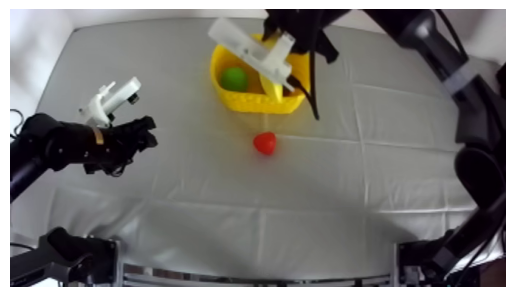

In [40]:
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

for i in range(10,1000, 10):
    sample = dataset[i]
    image = transform_image(sample["observation.images.top"])

    plt.imshow(image)
    plt.axis('off')
    display(plt.gcf())   # show current figure
    clear_output(wait=True)  # clear for next iteration

In [10]:
preprocessor, postprocessor = make_pi05_pre_post_processors_ki(
        policy.config,
        dataset_stats=dataset.meta.stats,  # Important: pass dataset stats for normalization
    )

tokenizer_config.json:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

In [43]:
batch2.keys()

dict_keys(['action', 'next.reward', 'next.done', 'next.truncated', 'info', 'task', 'index', 'task_index', 'episode_index', 'observation.images.left', 'observation.images.top', 'observation.images.right', 'observation.state', 'observation.language.tokens', 'observation.language.attention_mask'])

In [44]:
images, img_masks = policy._preprocess_images(batch2)
tokens = batch2["observation.language.tokens"]
masks = batch2["observation.language.attention_mask"]

In [67]:
image[0].shape

torch.Size([672, 3])

In [68]:
img_masks

[tensor([True], device='cuda:0'),
 tensor([True], device='cuda:0'),
 tensor([True], device='cuda:0')]

In [69]:
prompt = tokenizer.batch_decode(tokens, skip_special_tokens=True)
prompt

['Task: pick up the banana., State: -1 0 255 114 77 112 -1 164 -1 255 175 53 20 2 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128;\nAction: ']

In [64]:
tokens.shape

torch.Size([1, 200])

In [46]:
subtask = policy.model.sample_autoregressive(images, img_masks, tokens, masks,100, 1, 0.5)

In [47]:
subtask

(tensor([[  3351, 255649,   3124,   3351,      1,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0]], device='cuda:0'),
 <transformers.cache_utils.DynamicCache at 0x794466a04770>)

In [48]:
def detokenize(tokens, tokenizer):
    return tokenizer.batch_decode(tokens, skip_special_tokens=True)


In [50]:
from transformers import AutoTokenizer
# Load tokenizer
print("Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained("google/paligemma-3b-pt-224",
                                          use_fast=False)

Loading tokenizer...


In [55]:
subtask

(tensor([[  3351, 255649,   3124,   3351,      1,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0,      0,      0,      0,      0,      0,      0,      0,      0,
               0]], device='cuda:0'),
 <transformers.cache_utils.DynamicCache at 0x794466a04770>)

In [57]:
out = tokenizer.batch_decode(subtask[0], skip_special_tokens=True)
out

['Sub︐ moveSub']

In [60]:
dataset

LeRobotDataset({
    Repository ID: 'NONHUMAN-RESEARCH/TEST_RECORD_ANNOTATIONS',
    Number of selected episodes: '4',
    Number of selected samples: '4352',
    Features: '['action', 'observation.state', 'observation.images.left', 'observation.images.top', 'observation.images.right', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index']',
})',

In [61]:
for i in range(100):
  print(dataset[i]["timestamp"])
  print(dataset[i]["action"].shape)


tensor(0.)
torch.Size([14])
tensor(0.0200)
torch.Size([14])
tensor(0.0400)
torch.Size([14])
tensor(0.0600)
torch.Size([14])
tensor(0.0800)
torch.Size([14])
tensor(0.1000)
torch.Size([14])
tensor(0.1200)
torch.Size([14])
tensor(0.1400)
torch.Size([14])
tensor(0.1600)
torch.Size([14])
tensor(0.1800)
torch.Size([14])
tensor(0.2000)
torch.Size([14])
tensor(0.2200)
torch.Size([14])
tensor(0.2400)
torch.Size([14])
tensor(0.2600)
torch.Size([14])
tensor(0.2800)
torch.Size([14])
tensor(0.3000)
torch.Size([14])
tensor(0.3200)
torch.Size([14])
tensor(0.3400)
torch.Size([14])
tensor(0.3600)
torch.Size([14])
tensor(0.3800)
torch.Size([14])
tensor(0.4000)
torch.Size([14])
tensor(0.4200)
torch.Size([14])
tensor(0.4400)
torch.Size([14])
tensor(0.4600)
torch.Size([14])
tensor(0.4800)
torch.Size([14])
tensor(0.5000)
torch.Size([14])
tensor(0.5200)
torch.Size([14])
tensor(0.5400)
torch.Size([14])
tensor(0.5600)
torch.Size([14])
tensor(0.5800)
torch.Size([14])
tensor(0.6000)
torch.Size([14])
tensor(0.620